<a href="https://colab.research.google.com/github/AminaZahid/Hate-Speech-Detection-using-ML-and-DL/blob/main/HSD_7_Algos(6ML%2C_1_DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the packages
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier

In [2]:
#pip install nltk

In [3]:
import nltk

In [4]:
nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
data = pd. read_csv("/content/drive/MyDrive/Hate Speech and Offensive Langauge Dataset.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df=data.copy()

In [7]:
data["labels"] = data["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
print(data. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [8]:
import re

In [9]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text)
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 #text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text
data["tweet"] = data["tweet"]. apply(clean)

In [10]:
x = np. array(data["tweet"])
y = np. array(data["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
#Model building - DT
model = DecisionTreeClassifier()
#Training the model
model. fit(X_train,y_train)
y_pred = model. predict (X_test)
#Accuracy Score of our model
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.8804303967720242


In [14]:
#Model building - SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)

print (accuracy_score (y_test,svc_pred))

0.9004707464694015


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train,y_train)

lr_pred = LR.predict(X_test)

print (accuracy_score (y_test,lr_pred))

0.8973772696704775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Random Forest

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

rf_pred = RF.predict(X_test)

print (accuracy_score (y_test,rf_pred))

0.8907868190988567


In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=100,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train, y_train)

mpl_pred = clf.predict(X_test)
print (accuracy_score (y_test,mpl_pred))

0.8708809683927371


In [22]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
k_range = range(1,26)
scores = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    scores.append(accuracy_score(pred,y_test)*100)

print(pd.DataFrame(scores))

            0
0   81.439139
1   80.847344
2   81.640888
3   84.411567
4   84.505716
5   84.519166
6   84.317418
7   84.317418
8   83.913921
9   83.873571
10  83.496974
11  83.402824
12  83.389375
13  83.120377
14  83.093477
15  82.932078
16  83.093477
17  82.663080
18  82.461332
19  82.246133
20  82.192334
21  82.111634
22  81.909886
23  81.735037
24  81.492939


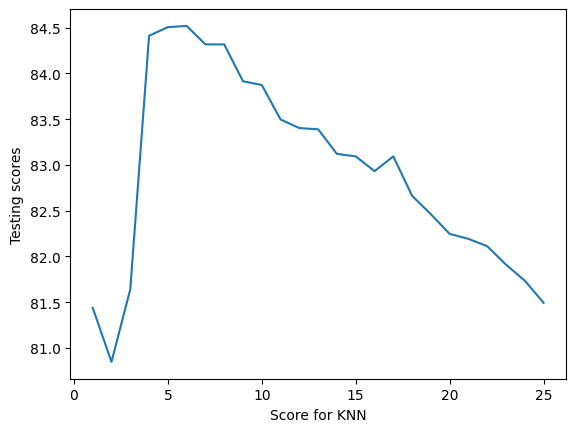

In [23]:
plt.plot(k_range,scores)
plt.xlabel("Score for KNN")
plt.ylabel("Testing scores")
plt.show()

In [24]:
from sklearn.linear_model import Perceptron
#Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

print("ACC: ",accuracy_score(clf_pred,y_test))

clf_score = accuracy_score(clf_pred,y_test)*100

ACC:  0.8597175521183591


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [53]:
max_words = 5000
max_len = 100

In [54]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=max_len),
	layers.Bidirectional(layers.LSTM(16)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

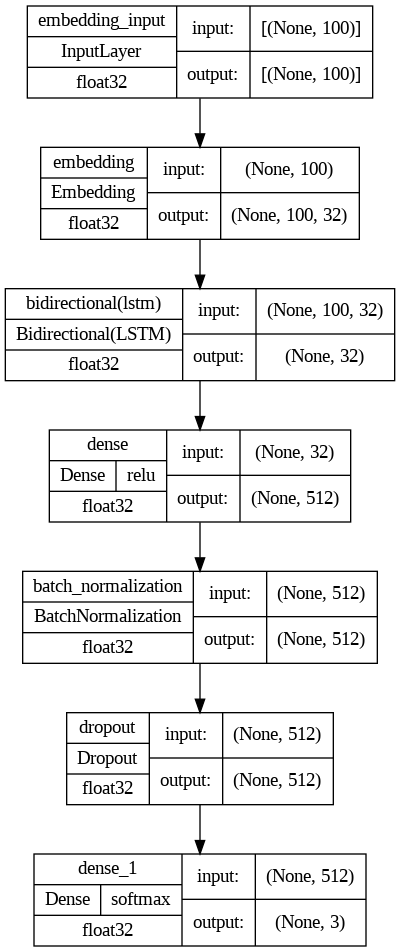

In [55]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [56]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)
